In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from graphing_utils import *
from plots import *

import rpy2
%load_ext rpy2.ipython

<div align='center' style="background-image: url('./blood.webp');">
    <font size='+3' color='#dd0000'>
        <b>The SpecAccs Murder Conspiracy! 🔪</b>
    </font>
    <br>
    <font size='+2.5' color='#FBAB60'>
        <b>A Short Data Analytics Comic</b>
    </font>
</div>

# Starts from below

In [2]:
%%R

library(tidyverse)
library(multidplyr)
library(frs)
library(fitdistrplus)
library(knitr)
library(readxl)
library(kableExtra)
library(clipr)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Loading required package: scales

R[write to console]: 
Attaching package: ‘scales’


R[write to console]: The following object is masked from ‘package:purrr’:

    discard


R[write to console]: The following object is masked from ‘package:readr’:

    col_factor


R[write to console]: Loading required package: rmarkdown

R[write to console]: 
Attaching package: ‘frs’


R[write to console]: The following object is masked from ‘package:scales’:

    modulus_trans


R[write to console]: Loading required package: MASS

R[write

In [3]:
# Importing data processing libraries
import numpy as np
import pandas as pd

In [4]:
# Loading datasets
#   1. Kaggle ML & DL Survey 2021
#   2. Big Mac Index
#   3. Graduate Age Dataset
#   4. GPU Pricing Dataset

# Kaggle ML & DL Survey 2021 Data
#   Info: 2021
#   Link: https://www.kaggle.com/c/kaggle-survey-2021/data
def data_processing_func(data):
    cols = [*data.columns]
    group_cols = [x for x in cols if 'Selected Choice' in x]
    group_cols_main_ques = [x.split(' - Selected Choice')[0] for x in group_cols]
    group_cols_uniq_main_ques = np.unique(group_cols_main_ques)
    
    def group_cols_func(x):
        answer_list = []
        for col in x.keys():
            if(pd.isnull(x[col]) == False):
                answer_list.append(x[col])
        return ' | '.join(answer_list)

    grouped_cols_df = pd.DataFrame()
    for ques_idx, ques in enumerate(group_cols_uniq_main_ques):
        ques_group_cols = [x for x in group_cols if x.startswith(ques)]
        grouped_col_df = data[ques_group_cols].apply(group_cols_func, axis = 1)
        grouped_cols_df = pd.concat([grouped_cols_df, grouped_col_df], axis = 1)
    grouped_cols_df.columns = group_cols_uniq_main_ques
    
    data = data.drop(group_cols, axis = 1)
    data = pd.concat([data, grouped_cols_df], axis = 1)
    return data
raw_data = pd.read_csv('./Data/kaggle-survey-2021/kaggle_survey_2021_responses.csv', header = [0], skiprows = [0])
data = data_processing_func(raw_data)
data_questions = data.columns
data.columns = [f'Q_{x}' for x in range(data.shape[1])]
raw_data['kaggler_id'] = pd.Series(np.arange(raw_data.shape[0]))
data['kaggler_id'] = pd.Series(np.arange(data.shape[0]))

# Big Mac Index
#   Info: GDP-adjusted, Jul 2021
#   Link: https://www.economist.com/big-mac-index
bigmac_idx = {
    'India': -18.4,
    'Indonesia': -26.8,
    'Pakistan': 16.5,
    'Mexico': -6.1,
    'Russia': -34.3,
    'Turkey': -31.1,
    'Australia': -8.1,
    'Nigeria': np.nan,
    'Greece': 9.2,
    'Belgium': 9.2,
    'Japan': -24.4,
    'Egypt': -14.9,
    'Singapore': -21.1,
    'Brazil': 31.5,
    'Poland': -6.7,
    'China': -0.4,
    'Iran, Islamic Republic of...': np.nan,
    'United States of America': 0,
    'Italy': 9.2,
    'Viet Nam': -5.8,
    'Israel': 6.7,
    'Peru': -0.7,
    'South Africa': -29.6,
    'Other': np.nan,
    'Spain': 9.2,
    'Bangladesh': np.nan,
    'United Kingdom of Great Britain and Northern Ireland': 1.0,
    'France': 9.2,
    'Switzerland': 6.5,
    'Algeria': np.nan,
    'Tunisia': np.nan,
    'Argentina': 16.3,
    'Sweden': 19.8,
    'Colombia': 3.5,
    'I do not wish to disclose my location': np.nan,
    'Canada': 10.2,
    'Chile': 10.2,
    'Netherlands': 9.2,
    'Ukraine': -25.1,
    'Saudi Arabia': -3.5,
    'Romania': -29.0,
    'Morocco': np.nan,
    'Austria': 9.2,
    'Taiwan': -38.9,
    'Kenya': np.nan,
    'Belarus': np.nan,
    'Ireland': 9.2,
    'Portugal': 9.2,
    'Hong Kong (S.A.R.)': -45.6,
    'Denmark': -14.2,
    'Germany': 9.2,
    'South Korea': -7.8,
    'Philippines': -11.2,
    'Sri Lanka': 10.0,
    'United Arab Emirates': -7.8,
    'Uganda': np.nan,
    'Ghana': np.nan,
    'Malaysia': -31.7,
    'Thailand': 17.0,
    'Nepal': np.nan,
    'Kazakhstan': np.nan,
    'Ethiopia': np.nan,
    'Iraq': np.nan,
    'Ecuador': np.nan,
    'Norway': 8.6,
    'Czech Republic': 2.9,
}

# Graduate Age Dataset
#   Info: 2020-21, UG & PG students
#   Link: https://hea.ie/statistics/data-for-download-and-visualisations/enrolments/key-facts-figures-2020-2021/
def get_student_age_data():
    data = pd.read_csv('./Data/student_age.csv')
    ug_data = data[data['Course'] == 'UG']
    pg_data = data[data['Course'] == 'PG']
    pg_data = pg_data.assign(Neg_Composition = -pg_data['Composition'])
    return ug_data, pg_data
ug_data, pg_data = get_student_age_data()

# GPU Pricing Dataset
#   Info: 2018
#   Link: https://www.kaggle.com/raczeq/ethereum-effect-pc-parts
def get_gpu_prices():
    data = pd.read_csv('./Data/gpu_prices/FACT_GPU_PRICE.csv')
    time_data = pd.read_csv('./Data/gpu_prices/DIM_TIME.csv')
    prod_data = pd.read_csv('./Data/gpu_prices/DIM_GPU_PROD.csv')
    region_data = pd.read_csv('./Data/gpu_prices/DIM_REGION.csv')
    prod_data['Memory_Capacity_category'] = prod_data['Memory_Capacity'].apply(lambda x: 'high' if x >= 10 else 'medium' if x >=2 else 'low')
    merged_data = pd.merge(data, time_data, how = 'left', left_on = 'TimeId', right_on = 'Id')
    merged_data = pd.merge(merged_data, prod_data, how = 'left', left_on = 'ProdId', right_on = 'Id')
    merged_data = pd.merge(merged_data, region_data, how = 'left', left_on = 'RegionId', right_on = 'Id')

    country_code_name_map = {
        'au': 'Australia',
        'be': 'Belgium',
        'ca': 'Canada',
        'de': 'Germany',
        'es': 'Spain',
        'fr': 'France',
        'ie': 'Ireland',
        'it': 'Italy',
        'nz': 'New Zealand',
        'uk': 'United Kingdom of Great Britain and Northern Ireland',
        'us': 'United States of America'
    }
    merged_data['Code'] = merged_data['Code'].map(country_code_name_map)
    merged_data = merged_data[merged_data['Code'] != 'New Zealand']
    merged_data['BigMac_index'] = merged_data['Code'].map(bigmac_idx)
    merged_data['ppp_price'] = merged_data['Price_USD'] * (1 + (merged_data['BigMac_index'] / 100.0))
    return merged_data
gpu_prices_data = get_gpu_prices()
gpu_prices_data = gpu_prices_data[gpu_prices_data['Year'] == 2018]

/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (195,201) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


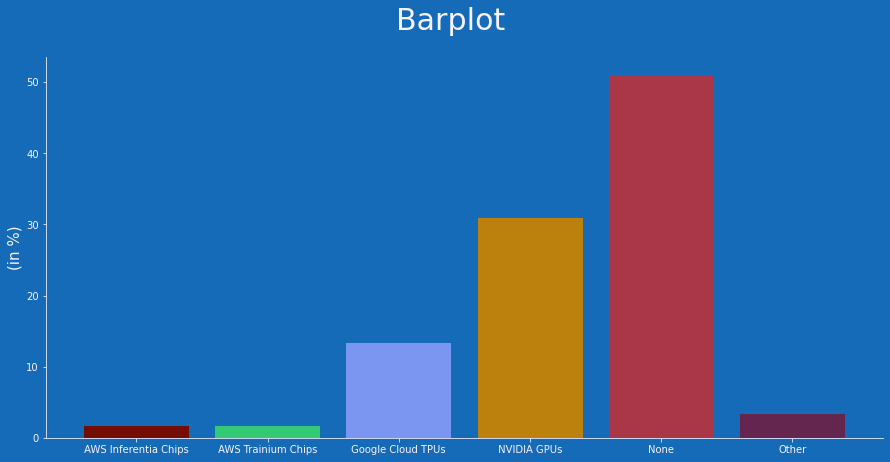

In [5]:
# TODO in R
# Plot count of SpecAccs
def plot_uniq_vals_in_ques(ques, kaggler_ids = [], rotation = 0, title = "", return_output = False):
    data = raw_data.set_index('kaggler_id')
    if(len(kaggler_ids) != 0):
        data = data.loc[kaggler_ids]
    sel_cols = [x for x in data.columns if ques in x]
    val_cnts = (data.shape[0] - pd.isnull(data[sel_cols]).sum().sort_index()) / data.shape[0] * 100
    plot_barplot(x_names = [x.split('Selected Choice - ')[-1] for x in val_cnts.index], y_vals = val_cnts, rotate_x = rotation, title = title, ylabel = "(in %)")
    if(return_output == True):
        return val_cnts
ques = 'Which types of specialized hardware do you use on a regular basis?'
plot_uniq_vals_in_ques(ques)

## Most Kagglers do not have Specialized Accelerators
## Among thos having, NVIDIA GPUs & Google Cloud TPUs are most popular

In [6]:
# TODO in R
# Print details about size of processed dataset & number of excluded columns
sel_cols = [x for x in raw_data.columns if 'Which types of specialized hardware do you use on a regular basis?' in x]
excl_index = pd.isnull(raw_data[sel_cols]).sum(axis = 1)
excl_index = excl_index[excl_index == 6].index
print(f'No. of Excluded Kagglers: {len(excl_index)}')
new_data = data.drop(excl_index, axis = 0)
print(f'Size of processed data: {new_data.shape}')
new_data['has_spec_acc'] = new_data['Q_50'].apply(lambda x: x != 'None')
new_data['num_spec_acc'] = new_data['Q_50'].apply(lambda x: 0 if x == 'None' else len(x.split('|')))

No. of Excluded Kagglers: 1391
Size of processed data: (24582, 53)


# Salary

In [7]:
salary_order = [
    '$0-999',
    '1,000-1,999',
    '2,000-2,999',
    '3,000-3,999',
    '4,000-4,999',
    '5,000-7,499',
    '7,500-9,999',
    '10,000-14,999',
    '15,000-19,999',
    '20,000-24,999',
    '25,000-29,999',
    '30,000-39,999',
    '40,000-49,999',
    '50,000-59,999',
    '60,000-69,999',
    '70,000-79,999',
    '80,000-89,999',
    '90,000-99,999',
    '100,000-124,999',
    '125,000-149,999',
    '150,000-199,999',
    '200,000-249,999',
    '250,000-299,999',
    '300,000-499,999',
    '$500,000-999,999',
    '>$1,000,000'
]
salaries = new_data['Q_10'].value_counts().loc[salary_order]

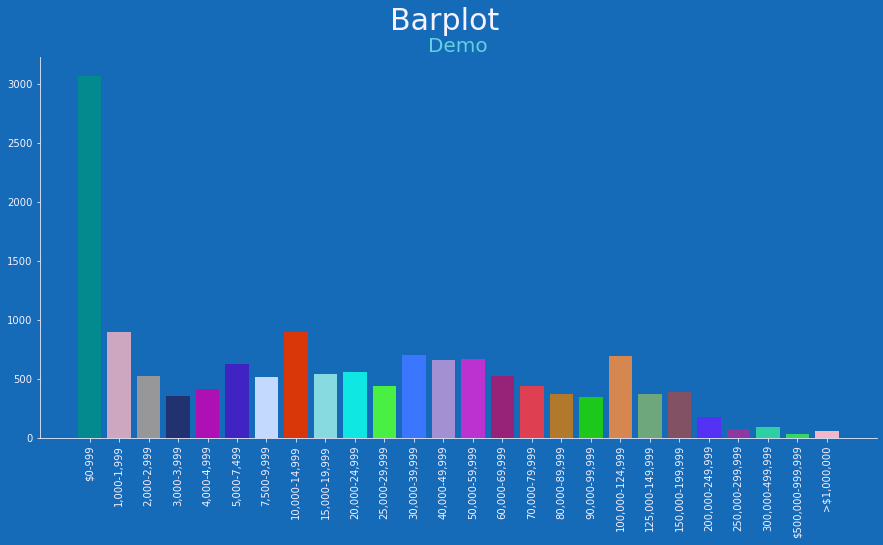

In [8]:
# TODO in R
# Plot barplot for salary counts
plot_barplot(salary_order, salaries.values, rotate_x = 90)

### Visualizing histograms with actually unequal bin widths can be misleading

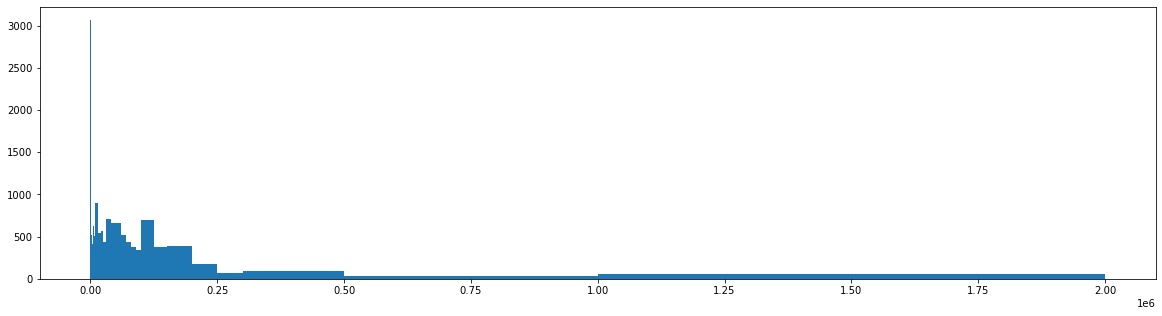

In [9]:
# TODO in R
# Plot barplot with actual bin widths
starting_points = [0   , 1000, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000, 200000, 250000, 300000, 500000, 1000000]
widths =          [1000, 1000, 1000, 1000, 1000, 2500, 2500,  5000,  5000,  5000,  5000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,  25000,  25000,  50000,  50000,  50000, 200000, 500000, 1000000]
ending_points = np.add(starting_points, widths)
mid_points = np.add(starting_points, np.divide(widths, 2))
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.bar(mid_points, salaries.values, width = widths)
plt.show()

### This is the true distribution which is the most accurate representation of the data

In [10]:
new_ppp_data = new_data.copy()
new_ppp_data['PPP_adjusted'] = new_data['Q_2'].map(bigmac_idx)
new_ppp_data = new_ppp_data.loc[~pd.isnull(new_ppp_data['PPP_adjusted'])]
new_ppp_data = new_ppp_data.loc[~pd.isnull(new_ppp_data['Q_10'])]
print(f"Shape of data after excluding countries for which we do not have PPP data & NAs in Q_10: {new_ppp_data.shape}")

new_ppp_data['min_sal'] = new_ppp_data['Q_10'].apply(lambda x: starting_points[salary_order.index(x)]) / 1000000
new_ppp_data['mid_sal'] = new_ppp_data['Q_10'].apply(lambda x: mid_points[salary_order.index(x)]) / 1000000
new_ppp_data['max_sal'] = new_ppp_data['Q_10'].apply(lambda x: ending_points[salary_order.index(x)]) / 1000000
new_ppp_data['PPP_adj_min_sal'] = new_ppp_data['min_sal'] * (1 + (new_ppp_data['PPP_adjusted'] / 100.0))
new_ppp_data['PPP_adj_mid_sal'] = new_ppp_data['mid_sal'] * (1 + (new_ppp_data['PPP_adjusted'] / 100.0))
new_ppp_data['PPP_adj_max_sal'] = new_ppp_data['max_sal'] * (1 + (new_ppp_data['PPP_adjusted'] / 100.0))
new_ppp_data_only_adj = new_ppp_data[['PPP_adj_min_sal', 'PPP_adj_max_sal']]

Shape of data after excluding countries for which we do not have PPP data & NAs in Q_10: (12522, 56)


[1] "Fitted Parameters:"
    shape      rate 
0.3619788 7.6292501 
[1] "Midpoint-based Mean: 0.049612"
[1] "Etimated Mean: 0.047446"


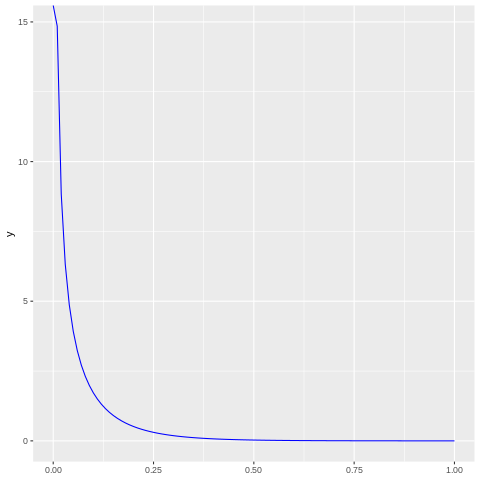

In [11]:
%%R -i new_ppp_data_only_adj -o alpha -o beta
# TODO: Make plot axis scale proper

colnames(new_ppp_data_only_adj) <- c('left', 'right')
fitted_distribution_gamma <- fitdistcens(new_ppp_data_only_adj, "gamma")

# overall fit:
print("Fitted Parameters:")
print(fitted_distribution_gamma$estimate)

# Mean
print(sprintf("Midpoint-based Mean: %f", new_ppp_data_only_adj %>%
  mutate(mid = (left + replace_na(right, 2)) / 2) %>%
  summarise(crude_mean = mean(mid)) %>%
  pull(crude_mean)))
print(sprintf("Etimated Mean: %f", fitted_distribution_gamma$estimate["shape"] / fitted_distribution_gamma$estimate["rate"]))

g <- ggplot(new_ppp_data_only_adj) +
  stat_function(fun = dgamma, args = fitted_distribution_gamma$estimate, colour = "blue")
print(g)

alpha <- fitted_distribution_gamma$estimate[['shape']]
beta <- fitted_distribution_gamma$estimate[['rate']]

### Approximating the censored distribution by fitting a gamma distribution

In [12]:
ppp_bins = [[*x] for x in [*new_ppp_data.groupby(['PPP_adj_min_sal', 'PPP_adj_max_sal'])['kaggler_id'].aggregate('count').index]]
ppp_bins = pd.DataFrame(ppp_bins, columns = ['min', 'max'])

In [13]:
%%R -i ppp_bins -i alpha -i beta -o ppp_bins

find_area_mid <- function(min, max, alpha, beta) {
  f_1 <- pgamma(min, shape = alpha, rate= beta)
  f_2 <- pgamma(max, shape = alpha, rate = beta)
  qgamma((f_1 + f_2) / 2.0, shape = alpha, rate = beta)
}

find_actual_mid <- function(min, max, alpha, beta) {
  samples <- rgamma(1000000, shape = alpha, rate = beta)
  actual_mids <- c()
  for (idx in 1:length(min)) {
    actual_mids <- c(actual_mids, mean(samples[(samples >= min[idx]) & (samples <= max[idx])]))
  }
  actual_mids
}

ppp_bins <- ppp_bins %>%
  mutate(final_mid = find_actual_mid(min, max, alpha, beta))

In [14]:
# TODO: For mention purposes
# %%R

# # TODO: Find avg error in mid-point value estimation
# starting_points <- c(0   , 1000, 2000, 3000, 4000, 5000, 7500, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000, 200000, 250000, 300000, 500000, 1000000)
# widths <-          c(1000, 1000, 1000, 1000, 1000, 2500, 2500,  5000,  5000,  5000,  5000, 10000, 10000, 10000, 10000, 10000, 10000, 10000,  25000,  25000,  50000,  50000,  50000, 200000, 500000, 1000000)

# samples <- rgamma(10000000, shape = alpha, rate = beta)
# errors <- c()

# for (idx in 1:length(starting_points)) {
#   min <- starting_points[idx] / 1000000
#   max <- (starting_points[idx] + widths[idx]) / 1000000
#   alpha <- 0.3619788
#   beta <- 7.6292501
#   #hist(samples, breaks = 100)
#   actual_mid <- mean(samples[(samples >= min) & (samples <= max)])
  
#   find_actual_mid <- function(min, max, alpha, beta) {
#     f_1 <- pgamma(min, shape = alpha, rate= beta)
#     f_2 <- pgamma(max, shape = alpha, rate = beta)
#     qgamma((f_1 + f_2) / 2.0, shape = alpha, rate = beta)
#   }
#   estimated_mid <- find_actual_mid(min, max, alpha, beta)
#   errors <- c(errors, abs((estimated_mid - actual_mid) / (widths[idx] / 1000000)) * 100)
# }

# plot(errors)

In [15]:
new_ppp_data = pd.merge(new_ppp_data, ppp_bins, how = 'inner', left_on = ['PPP_adj_min_sal', 'PPP_adj_max_sal'], right_on = ['min', 'max'])

/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

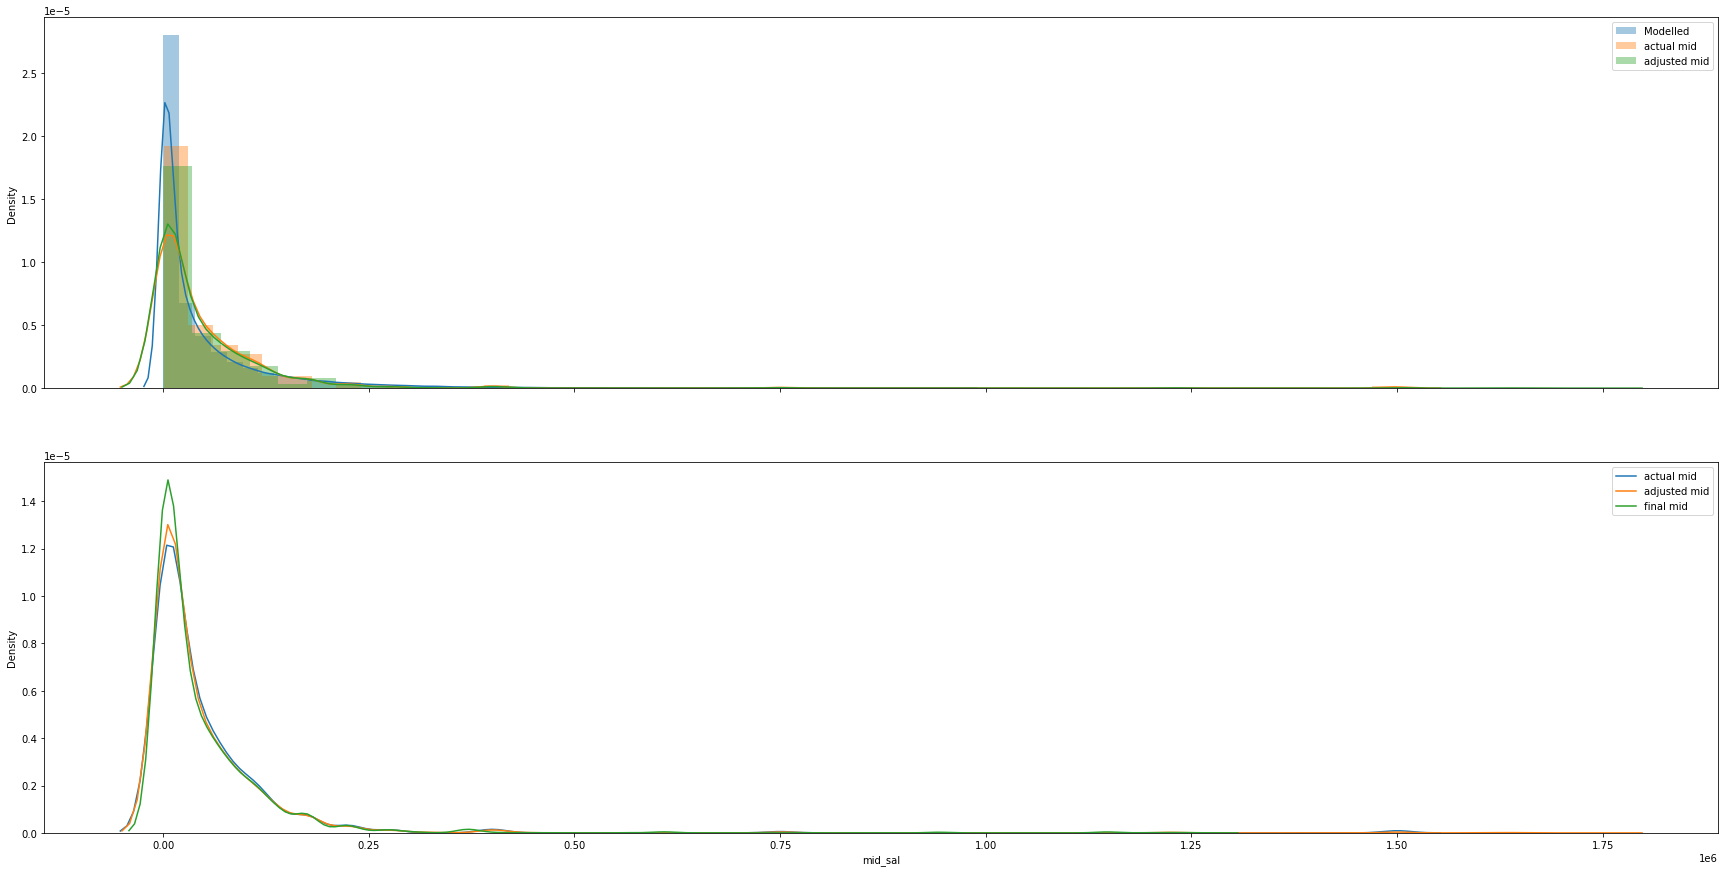

In [16]:
# TODO: In R
# Plot estimated distribution function

# alpha & beta derived from R
sampled_gamma = np.random.gamma(alpha[0], 1 / beta[0], 100000) * 1000000
fig, ax = plt.subplots(2, 1, figsize = (30, 15), sharex = True)
sns.distplot(sampled_gamma, ax = ax[0], label = 'Modelled')
sns.distplot(new_ppp_data['mid_sal'] * 1000000, ax = ax[0], label = 'actual mid')
sns.distplot(new_ppp_data['PPP_adj_mid_sal'] * 1000000, ax = ax[0], label = 'adjusted mid')
ax[0].legend(loc = 'best')
# sns.kdeplot(sampled_gamma, ax = ax[1], label = 'Modelled')
sns.kdeplot(new_ppp_data['mid_sal'] * 1000000, ax = ax[1], label = 'actual mid')
sns.kdeplot(new_ppp_data['PPP_adj_mid_sal'] * 1000000, ax = ax[1], label = 'adjusted mid')
sns.kdeplot(new_ppp_data['final_mid'] * 1000000, ax = ax[1], label = 'final mid')
ax[1].legend(loc = 'best')
# ax[2].bar(mid_points, salaries.values, width = widths)
plt.show()

### After fitting the gamma distribution, we can recalculate the true mid-point of each bin based on the fitted distribution. The true midpoint would now lie to the left of the geometric midpoint of each bin.

In [17]:
pivot_data = pd.pivot_table(new_data.groupby(['has_spec_acc', 'Q_10'])[['kaggler_id']].aggregate('count'), values = 'kaggler_id', index = ['Q_10'], columns = ['has_spec_acc'])
for col in pivot_data.columns:
    pivot_data[col] = pivot_data[col] / pivot_data[col].sum() * 100
pivot_data = pivot_data.loc[salary_order]

has_no_spec_acc = new_ppp_data[new_ppp_data['has_spec_acc'] == 0]
has_spec_acc = new_ppp_data[new_ppp_data['has_spec_acc'] == 1]
has_no_spec_acc_only_adj = has_no_spec_acc[['PPP_adj_min_sal', 'PPP_adj_max_sal']]
has_spec_acc_only_adj = has_spec_acc[['PPP_adj_min_sal', 'PPP_adj_max_sal']]

In [18]:
%%R -i has_no_spec_acc_only_adj -i has_spec_acc_only_adj -o alpha1 -o beta1 -o alpha2 -o beta2

colnames(has_no_spec_acc_only_adj) <- c('left', 'right')
fitted_distribution_gamma <- fitdistcens(has_no_spec_acc_only_adj, "gamma")
alpha1 <- fitted_distribution_gamma$estimate[['shape']]
beta1 <- fitted_distribution_gamma$estimate[['rate']]

colnames(has_spec_acc_only_adj) <- c('left', 'right')
fitted_distribution_gamma <- fitdistcens(has_spec_acc_only_adj, "gamma")
alpha2 <- fitted_distribution_gamma$estimate[['shape']]
beta2 <- fitted_distribution_gamma$estimate[['rate']]

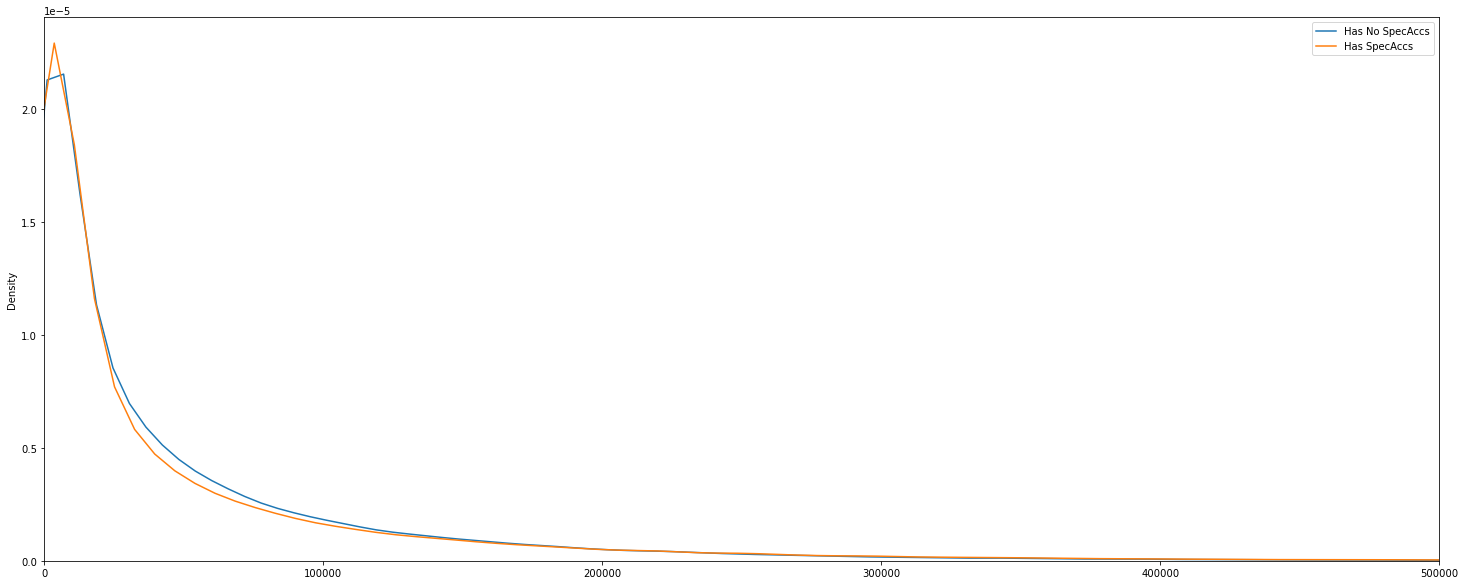

In [19]:
# TODO: in R
# Plot distribution for has & does not have SpecAccs

# alpha & beta derived from R
sampled_gamma1 = np.random.gamma(alpha1, 1 / beta1, 100000) * 1000000
# alpha & beta derived from R
sampled_gamma2 = np.random.gamma(alpha2, 1 / beta2, 100000) * 1000000

fig, ax = plt.subplots(1, 1, figsize = (25, 10))
sns.kdeplot(sampled_gamma1, ax = ax, label = 'Has No SpecAccs')
sns.kdeplot(sampled_gamma2, ax = ax, label = 'Has SpecAccs')
ax.legend(loc = 'best')
ax.set_xlim(0, 500000)
#ax.set_ylim(0, 0.5 * 1e-5)
plt.show()

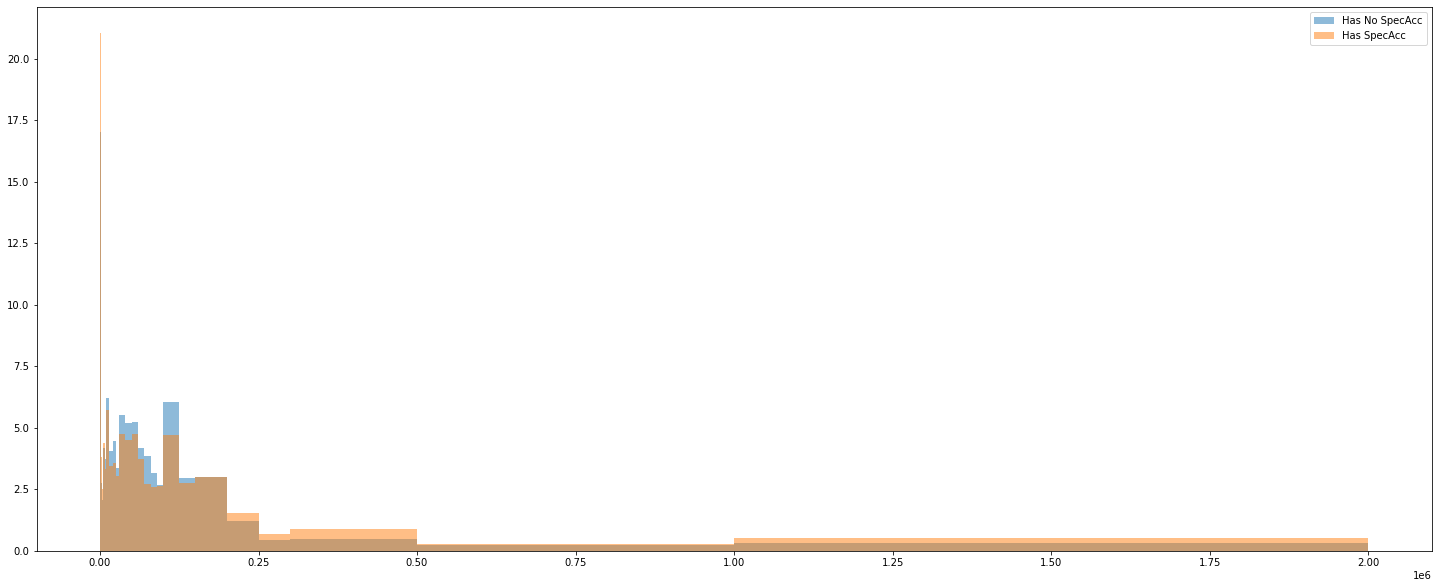

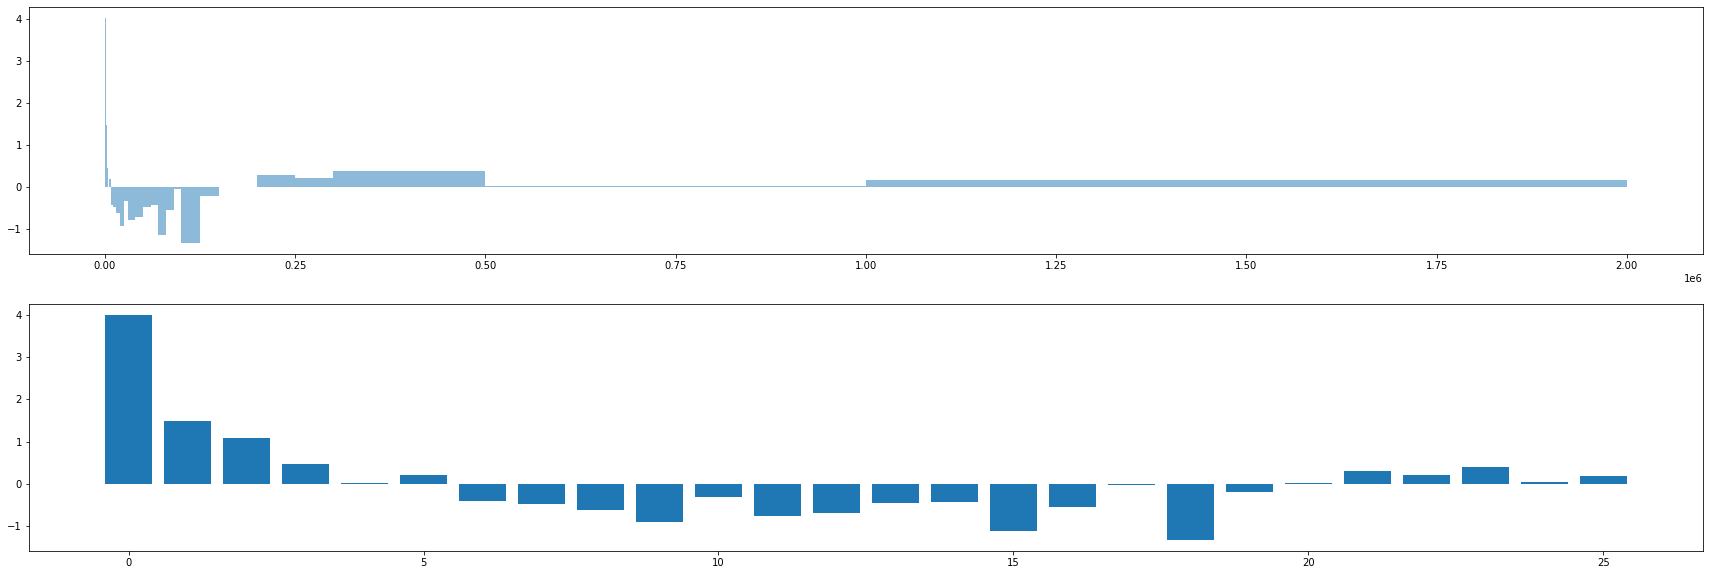

In [20]:
# TODO: in R
# Plot barplot for has & does not have SpecAccs

has_no_spec_acc_salaries = has_no_spec_acc['Q_10'].value_counts().loc[salary_order]
fig, ax = plt.subplots(1, 1, figsize = (25, 10))
ax.bar(mid_points, has_no_spec_acc_salaries.values / has_no_spec_acc_salaries.values.sum() * 100, width = widths, alpha = 0.5, label = "Has No SpecAcc")
has_spec_acc_salaries = has_spec_acc['Q_10'].value_counts().loc[salary_order]
ax.bar(mid_points, has_spec_acc_salaries.values / has_spec_acc_salaries.values.sum() * 100, width = widths, alpha = 0.5, label = "Has SpecAcc")
ax.legend(loc = 'best')
plt.show()

diff = ((has_spec_acc_salaries.values / has_spec_acc_salaries.values.sum()) - (has_no_spec_acc_salaries.values / has_no_spec_acc_salaries.values.sum())) * 100
fig, ax = plt.subplots(2, 1, figsize = (30, 10))
ax[0].bar(mid_points, diff, width = widths, alpha = 0.5)
ax[1].bar(np.arange(len(diff)), diff)
plt.show()

### Analyzing the distribution of Kagglers having and not having SpecAccs shows certain areas where the distribution slightly differs.
### By making the bins of same width, we can see a clear pattern - Extremely low & high salaries indicate presence of SpecAccs

In [21]:
# TODO: for mention purposes

# max_val = -1
# max_params = ()
# for i in range(5000, 1000000, 5000):
#     for j in range(5000, 1000000, 5000):
#         if(i > j):
#             continue
#         new_ppp_data['PPP_adj_sal_cats'] = new_ppp_data['final_mid'].apply(lambda x: 1 if ((x * 1000000 < i) | (x * 1000000 > j)) else 0)
#         val = new_ppp_data.groupby('PPP_adj_sal_cats')['has_spec_acc'].aggregate(['count', np.nanmean])
#         if(len(val.index) != 2):
#             continue
#         if(val['count'].min() < 1000):
#             continue
#         if((val.loc[0]['nanmean'] - 0.5) * (val.loc[1]['nanmean'] - 0.5) > 0):
#             continue
#         if((np.abs(val.loc[0]['nanmean'] - val.loc[1]['nanmean'])) > max_val):
#             max_val = np.abs(val.loc[0]['nanmean'] - val.loc[1]['nanmean'])
#             max_params = (i, j)
# print(max_val)
# print(max_params)

In [27]:
# TODO: in R
# Print actual categorical nanmeans

new_ppp_data['PPP_adj_sal_cats'] = new_ppp_data['final_mid'].apply(lambda x: 0 if (x * 1000000 < 5000) else 2 if (x * 1000000 > 175000) else 1)
new_ppp_data['PPP_adj_sal_cats'] = new_ppp_data['PPP_adj_sal_cats'].replace({0: '<$5000', 1: '$5000-$175000', 2: '>$175000'})
val = new_ppp_data.groupby('PPP_adj_sal_cats')['has_spec_acc'].aggregate(['count', np.nanmean]).reset_index(drop = False)
val['nanmean'] = val['nanmean'].apply(lambda x: np.round(x * 1000) / 1000)
print(val)

  PPP_adj_sal_cats  count  nanmean
0    $5000-$175000   7892    0.444
1           <$5000   4180    0.529
2         >$175000    450    0.589


In [23]:
new_ppp_data['PPP_adj_sal_cats'] = new_ppp_data['PPP_adj_mid_sal'].apply(lambda x: 1 if ((x * 1000000 < 5000) | (x * 1000000 > 175000)) else 0)
val = new_ppp_data.groupby('PPP_adj_sal_cats')['has_spec_acc'].aggregate(['count', np.nanmean])
new_ppp_data_only_adj = new_ppp_data[['PPP_adj_sal_cats', 'has_spec_acc']]
new_ppp_data_only_adj['PPP_adj_sal_cats'] = new_ppp_data_only_adj['PPP_adj_sal_cats'].astype(np.int32)
new_ppp_data_only_adj['has_spec_acc'] = new_ppp_data_only_adj['has_spec_acc'].astype(np.int32)

<ipython-input-23-ce65d45e2999>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ppp_data_only_adj['PPP_adj_sal_cats'] = new_ppp_data_only_adj['PPP_adj_sal_cats'].astype(np.int32)
<ipython-input-23-ce65d45e2999>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ppp_data_only_adj['has_spec_acc'] = new_ppp_data_only_adj['has_spec_acc'].astype(np.int32)


In [24]:
%%R -i new_ppp_data_only_adj
ttest <- t.test(has_spec_acc ~ PPP_adj_sal_cats, data = new_ppp_data_only_adj)
print(ttest)


	Welch Two Sample t-test

data:  has_spec_acc by PPP_adj_sal_cats
t = -9.8452, df = 9700.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.10880211 -0.07267052
sample estimates:
mean in group 0 mean in group 1 
      0.4441624       0.5348988 



# Low-salary Kagglers

## University Students?

In [25]:
age_order = [
    '18-21',
    '22-24',
    '25-29',
    '30-34',
    '35-39',
    '40-44',
    '45-49',
    '50-54',
    '55-59',
    '60-69',
    '70+',
]
ages = new_data['Q_1'].value_counts().loc[age_order]

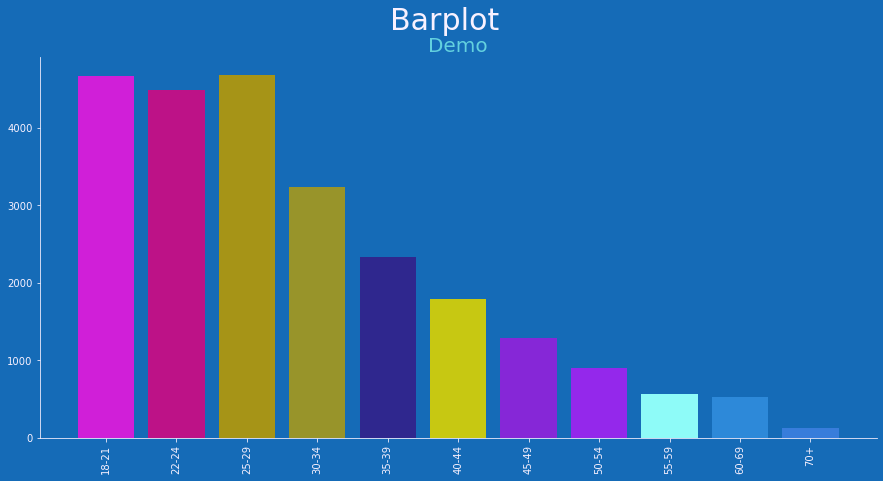

In [26]:
# TODO: in R
plot_barplot(age_order, ages.values, rotate_x = 90)

### Similar to salaries, the age data is also provided as censored bins.

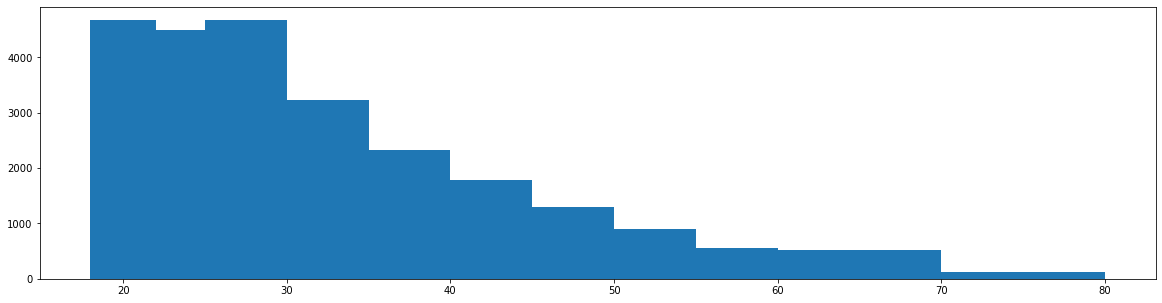

In [27]:
# TODO: in R
starting_points = [18, 22, 25, 30, 35, 40, 45, 50, 55, 60, 70]
widths =          [4 , 3 , 5 , 5 , 5 , 5 , 5 , 5 , 5 , 10, 10]
ending_points = np.add(starting_points, widths)
mid_points = np.add(starting_points, np.divide(widths, 2))
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.bar(mid_points, ages.values, width = widths)
plt.show()

### However, for age, the bin sizes do not vary too much. Hence the true representation does not differ much from the misleading representation

In [28]:
new_age_data = new_data.copy()
new_age_data['min_age'] = (new_age_data['Q_1'].apply(lambda x: starting_points[age_order.index(x)]) - 18) / 100
new_age_data['mid_age'] = (new_age_data['Q_1'].apply(lambda x: mid_points[age_order.index(x)]) - 18) / 100
new_age_data['max_age'] = (new_age_data['Q_1'].apply(lambda x: ending_points[age_order.index(x)]) - 18) / 100
new_age_data_only_adj = new_age_data[['min_age', 'max_age']]

In [29]:
%%R -i new_age_data_only_adj -o alpha -o beta

colnames(new_age_data_only_adj) <- c('left', 'right')
fitted_distribution_gamma <- fitdistcens(new_age_data_only_adj, "gamma")

# g <- ggplot(new_age_data_only_adj) +
#   stat_function(fun = dgamma, args = fitted_distribution_gamma$estimate, colour = "blue")
# print(g)

alpha <- fitted_distribution_gamma$estimate[['shape']]
beta <- fitted_distribution_gamma$estimate[['rate']]

### Similar to salaries, the censored age distribution can be approximated by a gamma distribution

In [30]:
age_bins = [[*x] for x in [*new_age_data.groupby(['min_age', 'max_age'])['kaggler_id'].aggregate('count').index]]
age_bins = pd.DataFrame(age_bins, columns = ['min', 'max'])

In [31]:
%%R -i age_bins -i alpha -i beta -o age_bins

find_actual_mid <- function(min, max, alpha, beta) {
  samples <- rgamma(1000000, shape = alpha, rate = beta)
  actual_mids <- c()
  for (idx in 1:length(min)) {
    actual_mids <- c(actual_mids, mean(samples[(samples >= min[idx]) & (samples <= max[idx])]))
  }
  actual_mids
}

age_bins <- age_bins %>%
  mutate(final_mid = find_actual_mid(min, max, alpha, beta))

In [32]:
new_age_data = pd.merge(new_age_data, age_bins, how = 'inner', left_on = ['min_age', 'max_age'], right_on = ['min', 'max'])

/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


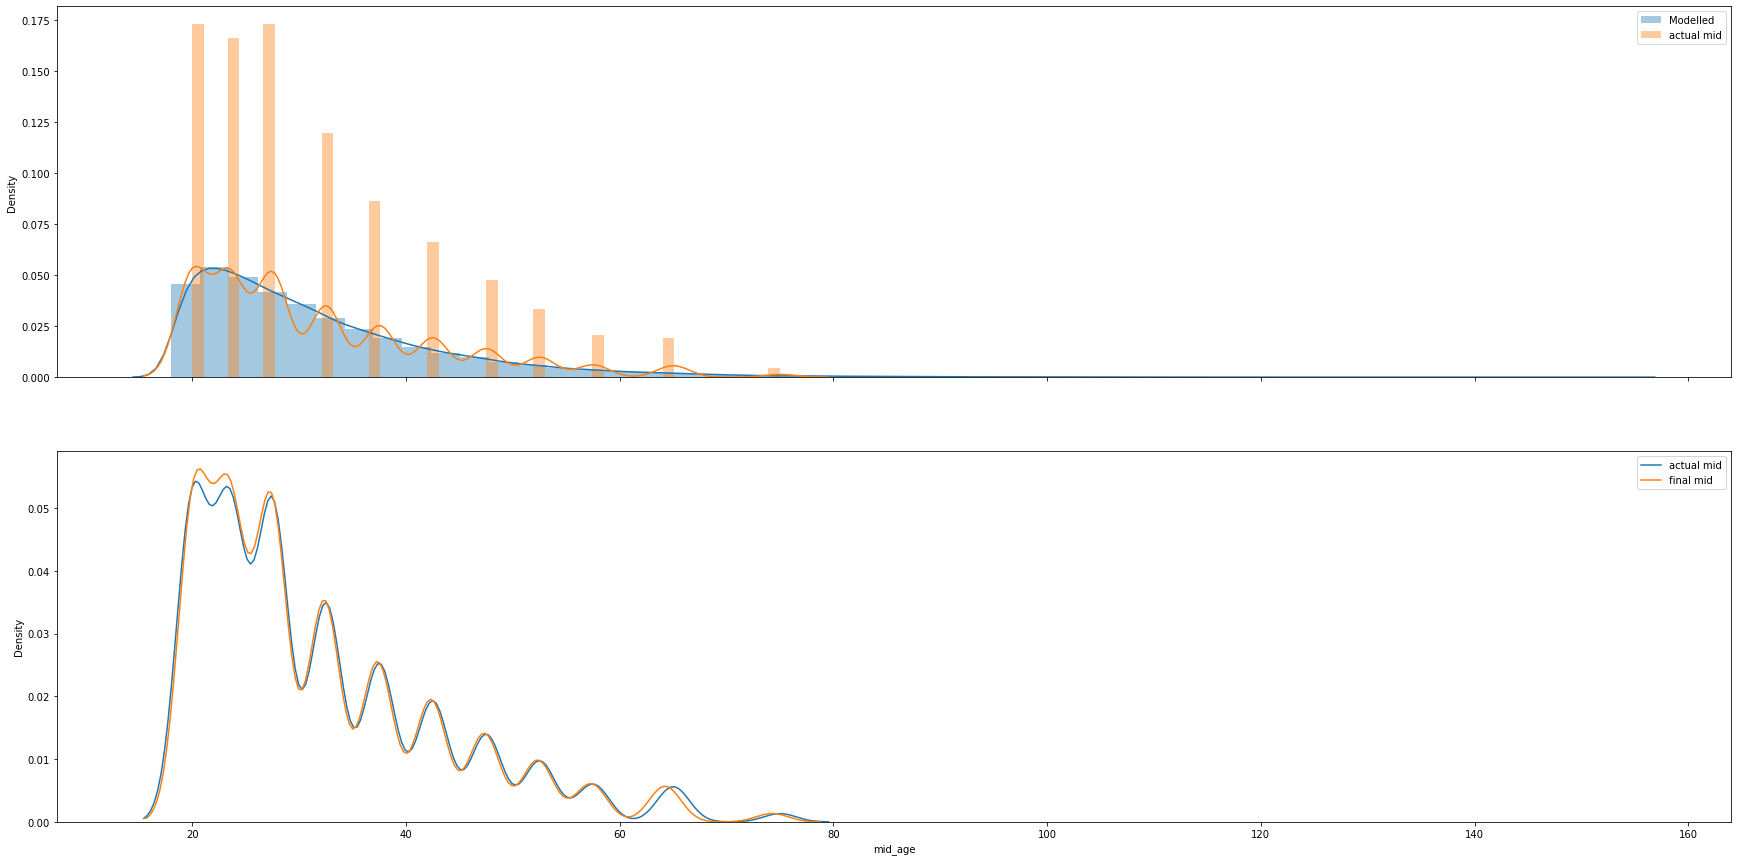

In [33]:
# TODO: in R
# alpha & beta derived from R

#sampled_gamma = np.random.gamma(alpha[0], 1 / beta[0], 100000) * 100 + 18
#fig, ax = plt.subplots(2, 1, figsize = (30, 15), sharex = True)
#sns.distplot(sampled_gamma, ax = ax[0], label = 'Modelled')
#sns.distplot(new_age_data['mid_age'] * 100 + 18, ax = ax[0], label = 'actual mid')
#ax[0].legend(loc = 'best')
# sns.kdeplot(sampled_gamma, ax = ax[1], label = 'Modelled')
#sns.kdeplot(new_age_data['mid_age'] * 100 + 18, ax = ax[1], label = 'actual mid')
#sns.kdeplot(new_age_data['final_mid'] * 100 + 18, ax = ax[1], label = 'final mid')
#ax[1].legend(loc = 'best')
# ax[2].bar(mid_points, salaries.values, width = widths)
#plt.show()

### The fitted fistribution seems to match the histogram nicely. Again, the actual mid-point would be lower than the geometric mid-point for each bin, but unlike the highly-skewed salary distribution, the difference is not much

In [34]:
new_age_ppp_data = pd.merge(new_ppp_data[['kaggler_id', 'final_mid']], new_age_data[['kaggler_id', 'final_mid']], how = 'inner', on = 'kaggler_id', suffixes = ['_salary', '_age'])

/home/sakshat/anaconda3/envs/Kaggle_Survey_Python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


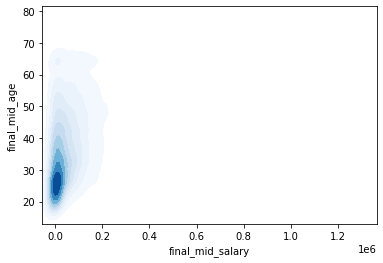

In [35]:
# TODO: in R
sns.kdeplot(new_age_ppp_data['final_mid_salary'] * 1000000, new_age_ppp_data['final_mid_age'] * 100 + 18, cmap = "Blues", shade = True)
plt.show()

### Combining both the salary & age distribution, one can see that most Kagglers seem to have low salaries & low to middle age.

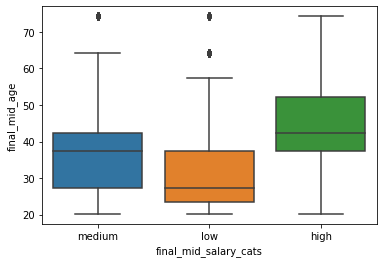

In [36]:
# TODO: in R
new_age_ppp_data['final_mid_salary_cats'] = new_age_ppp_data['final_mid_salary'].apply(lambda x: 'low' if x * 1000000 < 5000 else 'high' if x * 1000000 > 175000 else 'medium')
sns.boxplot(x = new_age_ppp_data['final_mid_salary_cats'], y = new_age_ppp_data['final_mid_age'] * 100 + 18)
plt.show()

### It is clear that Kagglers with low salaries have much lower median age than Kagglers with high salaries.

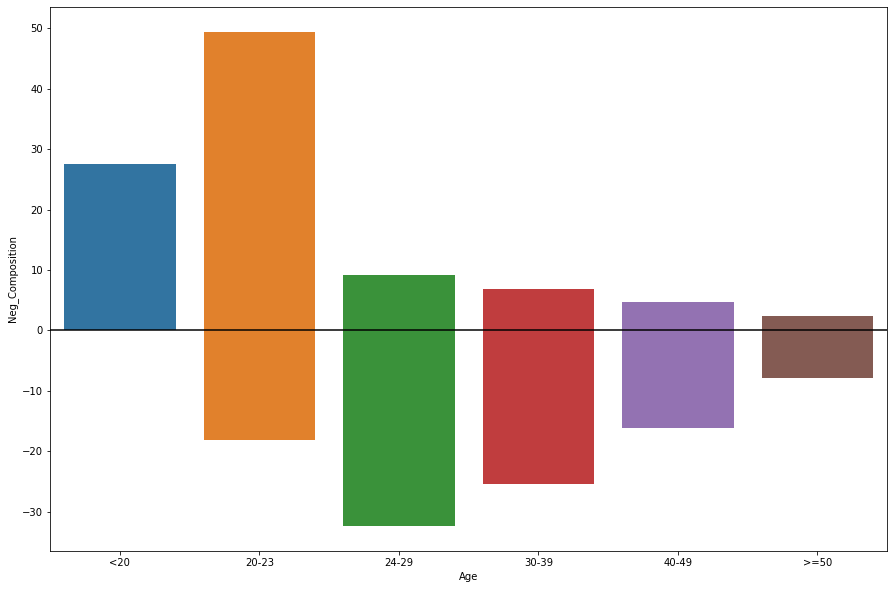

In [37]:
# TODO: in R
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
sns.barplot(x = 'Age', y = 'Composition', data = ug_data, ax = ax)
sns.barplot(x = 'Age', y = 'Neg_Composition', data = pg_data, ax = ax)
ax.axhline(0, color = 'black')
plt.show()

In [38]:
new_ppp_cats_data = pd.merge(new_ppp_data, new_age_ppp_data, how = 'left', on = 'kaggler_id')

## Passionate about AI?

### Coding Experience

In [39]:
coding_exp_order = ['< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
coding_exp = pd.pivot_table(new_ppp_cats_data.groupby(['final_mid_salary_cats', 'Q_4'])['kaggler_id'].aggregate('count').reset_index(drop = False), index = 'final_mid_salary_cats', columns = 'Q_4')['kaggler_id'][coding_exp_order].loc[['low', 'medium', 'high']]

In [40]:
coding_exp / np.repeat(coding_exp.sum(axis = 1).values, repeats = 6).reshape((3, 6)) * 100

Q_4,< 1 years,1-3 years,3-5 years,5-10 years,10-20 years,20+ years
final_mid_salary_cats,,,,,,
low,26.196172,34.832536,16.507177,10.861244,6.052632,5.550239
medium,11.530664,20.451090,17.600101,19.804866,16.624430,13.988849
high,4.888889,7.555556,7.111111,17.555556,24.888889,38.000000


In [41]:
coding_exps = new_ppp_cats_data['Q_4'].value_counts().loc[coding_exp_order]
# plot_barplot(coding_exp_order, coding_exps.values, rotate_x = 90)

starting_points = [0 , 1 , 3 , 5 , 10 , 20]
widths =          [1 , 2 , 2 , 5 , 10 , 20]
ending_points = np.add(starting_points, widths)
mid_points = np.add(starting_points, np.divide(widths, 2))
# fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# ax.bar(mid_points, coding_exps.values, width = widths)
# plt.show()

new_coding_exp_data = new_data.copy()
new_coding_exp_data['min_coding_exp'] = new_coding_exp_data['Q_4'].apply(lambda x: starting_points[coding_exp_order.index(x)]) / 50
new_coding_exp_data['mid_coding_exp'] = new_coding_exp_data['Q_4'].apply(lambda x: mid_points[coding_exp_order.index(x)]) / 50
new_coding_exp_data['max_coding_exp'] = new_coding_exp_data['Q_4'].apply(lambda x: ending_points[coding_exp_order.index(x)]) / 50
new_coding_exp_data_only_adj = new_coding_exp_data[['min_coding_exp', 'max_coding_exp']]

In [42]:
%%R -i new_coding_exp_data_only_adj -o alpha -o beta

colnames(new_coding_exp_data_only_adj) <- c('left', 'right')
fitted_distribution_gamma <- fitdistcens(new_coding_exp_data_only_adj, "gamma")

# g <- ggplot(new_coding_exp_data_only_adj) +
#   stat_function(fun = dgamma, args = fitted_distribution_gamma$estimate, colour = "blue")
# print(g)

alpha <- fitted_distribution_gamma$estimate[['shape']]
beta <- fitted_distribution_gamma$estimate[['rate']]

In [43]:
coding_exp_bins = [[*x] for x in [*new_coding_exp_data.groupby(['min_coding_exp', 'max_coding_exp'])['kaggler_id'].aggregate('count').index]]
coding_exp_bins = pd.DataFrame(coding_exp_bins, columns = ['min', 'max'])

In [44]:
%%R -i coding_exp_bins -i alpha -i beta -o coding_exp_bins

find_actual_mid <- function(min, max, alpha, beta) {
  samples <- rgamma(1000000, shape = alpha, rate = beta)
  actual_mids <- c()
  for (idx in 1:length(min)) {
    actual_mids <- c(actual_mids, mean(samples[(samples >= min[idx]) & (samples <= max[idx])]))
  }
  actual_mids
}

coding_exp_bins <- coding_exp_bins %>%
  mutate(final_mid = find_actual_mid(min, max, alpha, beta))

In [45]:
new_coding_exp_data = pd.merge(new_coding_exp_data, coding_exp_bins, how = 'inner', left_on = ['min_coding_exp', 'max_coding_exp'], right_on = ['min', 'max'])
salary_age_coding_exp_data = pd.merge(new_ppp_data[['final_mid', 'kaggler_id']], new_age_data[['final_mid', 'kaggler_id']], how = 'inner', on = 'kaggler_id', suffixes = ['_salary', '_age'])
salary_age_coding_exp_data = pd.merge(salary_age_coding_exp_data, new_coding_exp_data[['final_mid', 'kaggler_id']], how = 'inner', on = 'kaggler_id')
salary_age_coding_exp_data = pd.merge(salary_age_coding_exp_data, new_ppp_cats_data[['final_mid_salary_cats', 'kaggler_id']], how = 'inner', on = 'kaggler_id')
salary_age_coding_exp_data = salary_age_coding_exp_data.rename(columns = {'final_mid': 'final_mid_coding_exp'})
salary_age_coding_exp_data['coding_exp_by_age'] = salary_age_coding_exp_data['final_mid_coding_exp'] * 50 / ((salary_age_coding_exp_data['final_mid_age'] * 100) + 18) * 100

In [46]:
# TODO: in R
salary_age_coding_exp_data.groupby('final_mid_salary_cats')['coding_exp_by_age'].aggregate('mean')

final_mid_salary_cats
high      32.958113
low       12.636664
medium    20.940606
Name: coding_exp_by_age, dtype: float64

### ML experience

In [47]:
new_ppp_cats_data['Q_6'] = new_ppp_cats_data['Q_6'].map({
    '5-10 years': '5-10',
    '20 or more years': '20+',
    '3-4 years': '3-4',
    '4-5 years': '4-5',
    'I do not use machine learning methods': '<1',
    'Under 1 year': '<1',
    '2-3 years': '2-3',
    '1-2 years': '1-2',
    '10-20 years': '10-20',
})

ml_exp_order = ['<1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20', '20+']
ml_exp = pd.pivot_table(new_ppp_cats_data.groupby(['final_mid_salary_cats', 'Q_6'])['kaggler_id'].aggregate('count').reset_index(drop = False), index = 'final_mid_salary_cats', columns = 'Q_6')['kaggler_id'][ml_exp_order].loc[['low', 'medium', 'high']]

In [48]:
# TODO: in R
ml_exp / np.repeat(ml_exp.sum(axis = 1).values, repeats = 8).reshape((3, 8)) * 100

Q_6,<1,1-2,2-3,3-4,4-5,5-10,10-20,20+
final_mid_salary_cats,,,,,,,,
low,55.550239,23.612440,9.641148,4.497608,3.205742,2.224880,0.933014,0.334928
medium,38.139888,18.917892,14.166244,8.198175,7.551951,8.667005,2.838317,1.520527
high,16.666667,10.666667,8.444444,9.111111,10.444444,22.888889,13.333333,8.444444


In [49]:
ml_exps = new_ppp_cats_data['Q_6'].value_counts().loc[ml_exp_order]
# plot_barplot(ml_exp_order, ml_exps.values, rotate_x = 90)

starting_points = [0 , 1 , 2 , 3 , 4 , 5 , 10 , 20]
widths =          [1 , 1 , 1 , 1 , 1 , 5 , 10 , 10]
ending_points = np.add(starting_points, widths)
mid_points = np.add(starting_points, np.divide(widths, 2))
# fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# ax.bar(mid_points, ml_exps.values, width = widths)
# plt.show()

new_ml_exp_data = new_data.copy()
new_ml_exp_data['Q_6'] = new_ml_exp_data['Q_6'].map({
    '5-10 years': '5-10',
    '20 or more years': '20+',
    '3-4 years': '3-4',
    '4-5 years': '4-5',
    'I do not use machine learning methods': '<1',
    'Under 1 year': '<1',
    '2-3 years': '2-3',
    '1-2 years': '1-2',
    '10-20 years': '10-20',
})
new_ml_exp_data = new_ml_exp_data[~pd.isnull(new_ml_exp_data['Q_6'])]
new_ml_exp_data['min_ml_exp'] = new_ml_exp_data['Q_6'].apply(lambda x: starting_points[ml_exp_order.index(x)]) / 50
new_ml_exp_data['mid_ml_exp'] = new_ml_exp_data['Q_6'].apply(lambda x: mid_points[ml_exp_order.index(x)]) / 50
new_ml_exp_data['max_ml_exp'] = new_ml_exp_data['Q_6'].apply(lambda x: ending_points[ml_exp_order.index(x)]) / 50
new_ml_exp_data_only_adj = new_ml_exp_data[['min_ml_exp', 'max_ml_exp']]

In [50]:
%%R -i new_ml_exp_data_only_adj -o alpha -o beta

colnames(new_ml_exp_data_only_adj) <- c('left', 'right')

fitted_distribution_gamma <- fitdistcens(new_ml_exp_data_only_adj, "gamma")

# g <- ggplot(new_ml_exp_data_only_adj) +
#   stat_function(fun = dgamma, args = fitted_distribution_gamma$estimate, colour = "blue")
# print(g)

alpha <- fitted_distribution_gamma$estimate[['shape']]
beta <- fitted_distribution_gamma$estimate[['rate']]

In [51]:
ml_exp_bins = [[*x] for x in [*new_ml_exp_data.groupby(['min_ml_exp', 'max_ml_exp'])['kaggler_id'].aggregate('count').index]]
ml_exp_bins = pd.DataFrame(ml_exp_bins, columns = ['min', 'max'])

In [52]:
%%R -i ml_exp_bins -i alpha -i beta -o ml_exp_bins

find_actual_mid <- function(min, max, alpha, beta) {
  samples <- rgamma(1000000, shape = alpha, rate = beta)
  actual_mids <- c()
  for (idx in 1:length(min)) {
    actual_mids <- c(actual_mids, mean(samples[(samples >= min[idx]) & (samples <= max[idx])]))
  }
  actual_mids
}

ml_exp_bins <- ml_exp_bins %>%
  mutate(final_mid = find_actual_mid(min, max, alpha, beta))

In [53]:
new_ml_exp_data = pd.merge(new_ml_exp_data, ml_exp_bins, how = 'inner', left_on = ['min_ml_exp', 'max_ml_exp'], right_on = ['min', 'max'])
salary_age_ml_exp_data = pd.merge(new_ppp_data[['final_mid', 'kaggler_id']], new_age_data[['final_mid', 'kaggler_id']], how = 'inner', on = 'kaggler_id', suffixes = ['_salary', '_age'])
salary_age_ml_exp_data = pd.merge(salary_age_ml_exp_data, new_ml_exp_data[['final_mid', 'kaggler_id']], how = 'inner', on = 'kaggler_id')
salary_age_ml_exp_data = pd.merge(salary_age_ml_exp_data, new_ppp_cats_data[['final_mid_salary_cats', 'kaggler_id']], how = 'inner', on = 'kaggler_id')
salary_age_ml_exp_data = salary_age_ml_exp_data.rename(columns = {'final_mid': 'final_mid_ml_exp'})
salary_age_ml_exp_data['ml_exp_by_age'] = salary_age_ml_exp_data['final_mid_ml_exp'] * 50 / ((salary_age_ml_exp_data['final_mid_age'] * 100) + 18) * 100

In [54]:
salary_age_ml_exp_data.groupby('final_mid_salary_cats')['ml_exp_by_age'].aggregate('mean')

final_mid_salary_cats
high      14.378329
low        4.341447
medium     7.016845
Name: ml_exp_by_age, dtype: float64

### Money Spent

In [55]:
new_ppp_cats_data['Q_11'] = new_ppp_cats_data['Q_11'].map({
    '$100-$999': '100_999',
    '$10,000-$99,999': '10000_99999',
    '$1000-$9,999': '1000_9999',
    '$0 ($USD)': '0',
    '$1-$99': '1_99',
    '$100,000 or more ($USD)': '>100000'
})
money_spent_order = ['0', '1_99', '100_999', '1000_9999', '10000_99999', '>100000']
money_spent = pd.pivot_table(new_ppp_cats_data.groupby(['final_mid_salary_cats', 'Q_11'])['kaggler_id'].aggregate('count').reset_index(drop = False), index = 'final_mid_salary_cats', columns = 'Q_11')['kaggler_id'][money_spent_order].loc[['low', 'medium', 'high']]

In [56]:
# TODO: in R
money_spent / np.repeat(money_spent.sum(axis = 1).values, repeats = 6).reshape((3, 6)) * 100

Q_11,0,1_99,100_999,1000_9999,10000_99999,>100000
final_mid_salary_cats,,,,,,
low,47.333659,18.811155,17.294521,11.766145,3.253425,1.541096
medium,32.411320,9.527468,16.865156,20.130619,12.203867,8.861570
high,16.143498,3.587444,6.726457,15.246637,18.161435,40.134529


In [78]:
money_spents = new_ppp_cats_data['Q_11'].value_counts().loc[money_spent_order]
# plot_barplot(money_spent_order, money_spents.values, rotate_x = 90)

starting_points = [0 , 1  , 100 , 1000 , 10000 , 100000]
widths =          [1 , 99 , 900 , 9000 , 90000 , 100000]
ending_points = np.add(starting_points, widths)
mid_points = np.add(starting_points, np.divide(widths, 2))
# fig, ax = plt.subplots(1, 1, figsize = (20, 5))
# ax.bar(mid_points, ml_exps.values, width = widths)
# plt.show()

new_money_spent_data = new_data.copy()
new_money_spent_data['Q_11'] = new_money_spent_data['Q_11'].map({
    '$100-$999': '100_999',
    '$10,000-$99,999': '10000_99999',
    '$1000-$9,999': '1000_9999',
    '$0 ($USD)': '0',
    '$1-$99': '1_99',
    '$100,000 or more ($USD)': '>100000'
})
new_money_spent_data = new_money_spent_data.loc[~pd.isnull(new_money_spent_data['Q_11'])]
new_money_spent_data['min_money_spent'] = new_money_spent_data['Q_11'].apply(lambda x: starting_points[money_spent_order.index(x)]) / 100000
new_money_spent_data['mid_money_spent'] = new_money_spent_data['Q_11'].apply(lambda x: mid_points[money_spent_order.index(x)]) / 100000
new_money_spent_data['max_money_spent'] = new_money_spent_data['Q_11'].apply(lambda x: ending_points[money_spent_order.index(x)]) / 100000
new_money_spent_data_only_adj = new_money_spent_data[['min_money_spent', 'max_money_spent']]

In [79]:
%%R -i new_money_spent_data_only_adj -o alpha -o beta

colnames(new_money_spent_data_only_adj) <- c('left', 'right')

fitted_distribution_gamma <- fitdistcens(new_money_spent_data_only_adj, "gamma")

# g <- ggplot(new_money_spent_data_only_adj) +
#   stat_function(fun = dgamma, args = fitted_distribution_gamma$estimate, colour = "blue")
# print(g)

alpha <- fitted_distribution_gamma$estimate[['shape']]
beta <- fitted_distribution_gamma$estimate[['rate']]

In [80]:
money_spent_bins = [[*x] for x in [*new_money_spent_data.groupby(['min_money_spent', 'max_money_spent'])['kaggler_id'].aggregate('count').index]]
money_spent_bins = pd.DataFrame(money_spent_bins, columns = ['min', 'max'])

In [81]:
%%R -i money_spent_bins -i alpha -i beta -o money_spent_bins

find_actual_mid <- function(min, max, alpha, beta) {
  samples <- rgamma(1000000, shape = alpha, rate = beta)
  actual_mids <- c()
  for (idx in 1:length(min)) {
    actual_mids <- c(actual_mids, mean(samples[(samples >= min[idx]) & (samples <= max[idx])]))
  }
  actual_mids
}

money_spent_bins <- money_spent_bins %>%
  mutate(final_mid = find_actual_mid(min, max, alpha, beta))

In [82]:
new_money_spent_data = pd.merge(new_money_spent_data, money_spent_bins, how = 'inner', left_on = ['min_money_spent', 'max_money_spent'], right_on = ['min', 'max'])
salary_money_spent_data = pd.merge(new_ppp_data[['final_mid', 'kaggler_id']], new_money_spent_data[['final_mid', 'kaggler_id']], how = 'inner', on = 'kaggler_id', suffixes = ['_salary', '_money_spent'])
salary_money_spent_data = pd.merge(salary_money_spent_data, new_ppp_cats_data[['final_mid_salary_cats', 'kaggler_id']], how = 'inner', on = 'kaggler_id')
salary_money_spent_data['money_spent_by_salary'] = (salary_money_spent_data['final_mid_money_spent'] * 100000 / 5) / (salary_money_spent_data['final_mid_salary'] * 1000000) * 100

In [83]:
salary_money_spent_data.groupby('final_mid_salary_cats')['money_spent_by_salary'].aggregate('mean')

final_mid_salary_cats
high        4.324470
low       137.319009
medium     10.296033
Name: money_spent_by_salary, dtype: float64

### Machine Learning Model usage

In [63]:
# ques = 'Which of the following ML algorithms do you use on a regular basis?'
# plot_uniq_vals_in_ques(ques, rotation = 90, kaggler_ids = new_ppp_cats_data['kaggler_id'].values)

In [64]:
# models = [x.split('Selected Choice - ')[1] for x in raw_data.columns if 'Which of the following ML algorithms do you use on a regular basis?' in x]
# models_count = {}
# for cat in ['low', 'medium', 'high']:
#     cat_data = new_ppp_cats_data[new_ppp_cats_data['final_mid_salary_cats'] == cat]
#     models_count[cat] = {}
#     for model in models:
#         models_count[cat][model] = cat_data['Q_35'].apply(lambda x: 1 if model in x else 0).sum() / cat_data.shape[0] * 100
# models_used = pd.DataFrame.from_dict(models_count, orient = 'index')

In [65]:
# models_used

In [66]:
# models = [x.split('Selected Choice - ')[1] for x in raw_data.columns if 'Which categories of computer vision methods do you use on a regular basis?' in x]
# models_count = {}
# for cat in ['low', 'medium', 'high']:
#     cat_data = new_ppp_cats_data[new_ppp_cats_data['final_mid_salary_cats'] == cat]
#     models_count[cat] = {}
#     for model in models:
#         models_count[cat][model] = cat_data['Q_34'].apply(lambda x: 1 if model in x else 0).sum() / cat_data.shape[0] * 100
# models_used = pd.DataFrame.from_dict(models_count, orient = 'index')

In [67]:
# models_used

In [68]:
# models = [x.split('Selected Choice - ')[1] for x in raw_data.columns if 'Which of the following natural language processing (NLP) methods do you use on a regular basis?' in x]
# models_count = {}
# for cat in ['low', 'medium', 'high']:
#     cat_data = new_ppp_cats_data[new_ppp_cats_data['final_mid_salary_cats'] == cat]
#     models_count[cat] = {}
#     for model in models:
#         models_count[cat][model] = cat_data['Q_48'].apply(lambda x: 1 if model in x else 0).sum() / cat_data.shape[0] * 100
# models_used = pd.DataFrame.from_dict(models_count, orient = 'index')

In [69]:
# models_used

# High-salary Kagglers

In [1]:
# TODO: in R
print(gpu_prices_data.groupby(['Memory_Capacity_category'])['ppp_price'].aggregate('median'))

NameError: name 'gpu_prices_data' is not defined

In [71]:
# TODO: in R
median_high_price = gpu_prices_data.groupby(['Memory_Capacity_category'])['ppp_price'].aggregate('median').loc['high']
print('Assuming 10% savings are used for buying a GPU -')
print(f'For low salary, {median_high_price / ((0 + 5000) * 0.1 / 2):.2f} years of work to buy 1 GPU')
print(f'For mid salary, {median_high_price / ((5000 + 175000) * 0.1 / 2) * 365:.2f} days of work to buy 1 GPU')
print(f'For high salary, {median_high_price / ((175000 + 2000000) * 0.1 / 2) * 365 * 24:.2f} hours of work to buy 1 GPU')

Assuming 25% savings -
For low salary, 2.07 years of work to buy 1 GPU
For mid salary, 21.02 days of work to buy 1 GPU
For high salary, 41.75 hours of work to buy 1 GPU
